# Housing Prices

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import normaltest
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

import warnings
warnings.filterwarnings(action="ignore")

from config import usr, pwd, url, port, db
import helpers as hp

%matplotlib inline

## Load Data
Load dataset used to create previously developed housing prices model.

In [2]:
df_model = pd.read_csv('housing_prices_pvalue_cut.csv')

In [3]:
df_model.head()

,lotshape_IR2_oh,lotconfig_CulDSac_oh,lotconfig_FR2_oh,neighborhood_Blueste_oh,neighborhood_BrDale_oh,neighborhood_BrkSide_oh,neighborhood_Crawfor_oh,neighborhood_Edwards_oh,neighborhood_Gilbert_oh,neighborhood_IDOTRR_oh,...,centralair_Y_oh,fireplacequ_None_oh,garagefinish_Unf_oh,saletype_WD_oh,salecondition_Normal_oh,totalbsmtsf_sd_bc_tk,grlivarea_sd_bc_tk,overallqual_sd_bc_tk,garage_car_area,saleprice_sd_bc_tk
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,-1.940823,-2.067985,-1.380554,-0.029387,-1.916145
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,-1.414143,-2.297888,-1.854980,-0.042709,-1.987917
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,-1.853206,-2.035142,-1.380554,-0.020383,-1.880777
3,0,0,0,0,0,0,1,0,0,0,...,1,0,1,1,0,-2.081825,-2.064898,-1.380554,-0.893866,-2.125607
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,-1.559332,-1.878974,-0.922772,0.778936,-1.824650


## Model 1

In [4]:
features = df_model.columns.tolist()
features.remove('saleprice_sd_bc_tk')
X = df_model.loc[:, features]
y = df_model['saleprice_sd_bc_tk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)

results_1 = sm.OLS(y_train, X_train).fit()

In [5]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     saleprice_sd_bc_tk   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     209.1
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:49:36   Log-Likelihood:                 1480.0
No. Observations:                1168   AIC:                            -2878.
Df Residuals:                    1127   BIC:                            -2670.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.2372      0.027    -45.852      0.000      -1.290      -1.184
lotshape_IR2_oh             0.0381      0.013      3.022      0.003       0.013       0.063
lotconfig_CulDSac_oh        0.0269      0.008      3.242      0.001       0.011       0.043
lotconfig_FR2_oh           -0.0214      0.012     -1.730      0.084      -0.046       0.003
neighborhood_Blueste_oh    -0.1383      0.070     -1.976      0.048      -0.276      -0.001
neighborhood_BrDale_oh     -0.1407      0.021     -6.568      0.000      -0.183      -0.099
neighborhood_BrkSide_oh    -0.0321      0.013     -2.433      0.015      -0.058      -0.006
neighborhood_Crawfor_oh     0.0406      0.012      3.259      0.001       0.016       0.065
neighborhood_Edwards_oh    -0.0665      0.010     -6.505      0.000      -0.087      -0.046
neighborhood_Gilbert_oh    -0.0208      0.010     -2.117      0.034      -0.040      -0.002
neighborhood_IDOTRR_oh     -0.0828      0.016     -5.168      0.000      -0.114      -0.051
neighborhood_MeadowV_oh    -0.1578      0.023     -6.752      0.000      -0.204      -0.112
neighborhood_Mitchel_oh    -0.0391      0.013     -3.064      0.002      -0.064      -0.014
neighborhood_NAmes_oh      -0.0448      0.009     -5.047      0.000      -0.062      -0.027
neighborhood_NPkVill_oh    -0.0647      0.029     -2.213      0.027      -0.122      -0.007
neighborhood_NWAmes_oh     -0.0407      0.011     -3.720      0.000      -0.062      -0.019
neighborhood_NoRidge_oh     0.0442      0.013      3.396      0.001       0.019       0.070
neighborhood_NridgHt_oh     0.0350      0.011      3.143      0.002       0.013       0.057
neighborhood_OldTown_oh    -0.0775      0.011     -6.932      0.000      -0.099      -0.056
neighborhood_SWISU_oh      -0.0343      0.017     -1.992      0.047      -0.068      -0.001
neighborhood_Sawyer_oh     -0.0423      0.012     -3.661      0.000      -0.065      -0.020
extercond_Fa_oh            -0.0371      0.016     -2.359      0.019      -0.068      -0.006
extercond_Po_oh            -0.1799      0.071     -2.535      0.011      -0.319      -0.041
foundation_CBlock_oh        0.0210      0.009      2.465      0.014       0.004       0.038
foundation_PConc_oh         0.0241      0.009      2.677      0.008       0.006       0.042
bsmtqual_Fa_oh             -0.0730      0.016     -4.567      0.000      -0.104      -0.042
bsmtqual_Gd_oh             -0.0453      0.008     -5.362      0.000      -0.062      -0.029
bsmtqual_TA_oh             -0.0521      0.010     -5.232      0.000      -0.072      -0.033
bsmtcond_Gd_oh              0.0710      0.015      4.896      0.000       0.043       0.099
bsmtcond_TA_oh              0.0569      0.011      5.145      0.000       0.035       0.079
bsmtexposure_Gd_oh          0.0261      0.008  

In [6]:
df_model_stats = hp.append_model_stats(results_1, 1)

In [7]:
df_model_stats

,model,fvalue,f_pvalue,rsquared,rsquared_adj,aic,bic
0,model_1,209.118008,0.0,0.881265,0.877051,-2877.912872,-2670.327898


**Observations:** The large adjusted R<sup>2</sup> value and small AIC and BIC values indicate that this model does a good job of explaining the target variable, housing prices.

### Evaluate Predictions

In [8]:
X_test = sm.add_constant(X_test)

y_pred = results_1.predict(X_test)

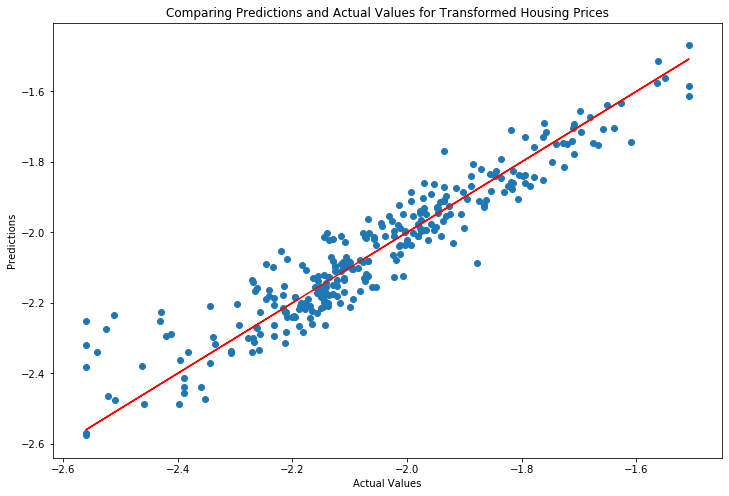

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(y_test, y_test, color='red')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Comparing Predictions and Actual Values for Transformed Housing Prices')
plt.show()

In [10]:
hp.print_prediction_metrics(y_test, y_pred)

Prediction Metrics:
* MAE = 0.054
* MSE = 0.005
* RMSE = 0.072
* MAPE = 2.608%


## Model 2
Remove features with coefficient values < 0.05.

In [11]:
df_results_1 = hp.store_results(results_1) 

In [12]:
features_2 = df_results_1.loc[df_results_1['abs_coeff'] > 0.05, 'feature'].tolist()

In [13]:
X = df_model.loc[:, features_2]
y = df_model['saleprice_sd_bc_tk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)

results_2 = sm.OLS(y_train, X_train).fit()

In [14]:
df_model_stats = hp.append_model_stats(results_2, 1)

### Evaluate Predictions

In [15]:
X_test = sm.add_constant(X_test)

y_pred = results_2.predict(X_test)

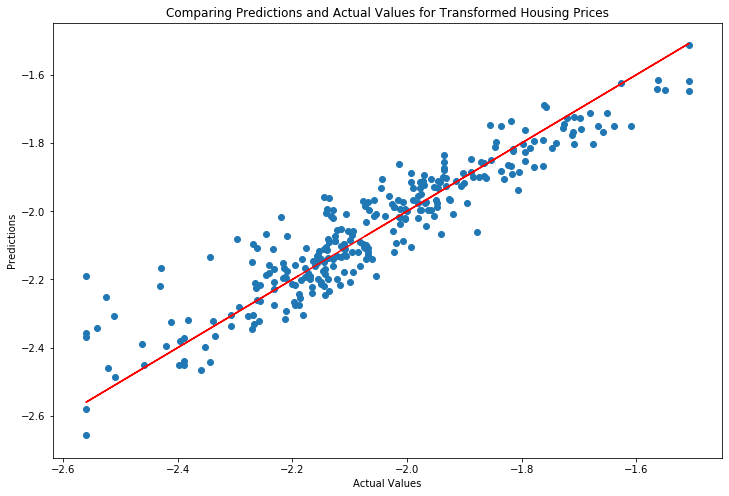

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(y_test, y_test, color='red')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Comparing Predictions and Actual Values for Transformed Housing Prices')
plt.show()

In [17]:
hp.print_prediction_metrics(y_test, y_pred)

Prediction Metrics:
* MAE = 0.059
* MSE = 0.006
* RMSE = 0.079
* MAPE = 2.903%


**Observations:** After removing features with smaller coefficients, the predictive power decreased only very slightly. The MAE, MSE, and RMSE becoming only 0.001 larger. Therefore, a smaller model does just as good a job at predicting housing prices as a larger model.